In [2]:
import joblib                as jlb
import matplotlib.pyplot     as plt
import numpy                 as np
import pandas                as pd
import seaborn               as sbn

from comet_ml                import ConfusionMatrix
from sklearn                 import metrics , svm
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc,roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.pipeline        import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import GridSearchCV

---
## Xử lí dữ liệu
---

In [3]:
df = pd.read_csv('D:\Code_learning\MachineLearning\Data\Social_Network_Ads.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16524\2723665035.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Code_learning\MachineLearning\Data\Social_Network_Ads.csv')


,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
0,15624510,Male,19,19000,19,0
1,15810944,Male,35,20000,20,0
2,15668575,Female,26,43000,43,0
3,15603246,Female,27,57000,57,0
4,15804002,Male,19,76000,76,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,41,1
396,15706071,Male,51,23000,23,1
397,15654296,Female,50,20000,20,1
398,15755018,Male,36,33000,33,0


In [4]:
## Các features: Gender, Age, EstimatedSalary
X = df.drop(['User ID', 'EstimatedSalary_K', 'Purchased'], axis = 1)
print(X.head())
## Biến target: Purchased
y = df.Purchased
print(y.head())

   Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [5]:
## Chuyển Gender thành kiểu Numerical
sex = {'Male':1, 'Female':0}
X['Male'] = [sex[i] for i in df.Gender]
X  = X.drop(['Gender'], axis = 1)
print(X.head())

   Age  EstimatedSalary  Male
0   19            19000     1
1   35            20000     1
2   26            43000     0
3   27            57000     0
4   19            76000     1


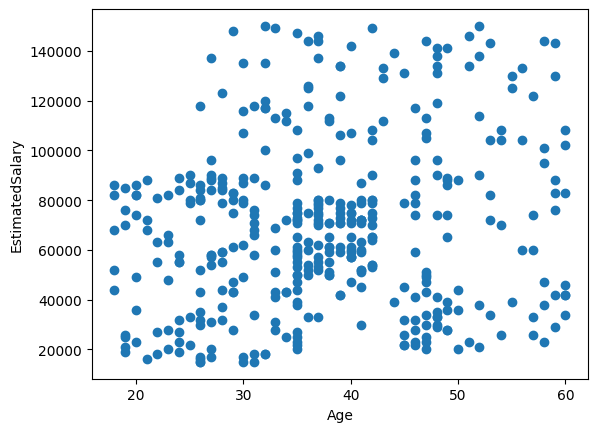

In [16]:
plt.scatter(X.Age,X.EstimatedSalary)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

In [6]:
## Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [7]:
#Áp dụng K-fold
cv = KFold(n_splits = 10, shuffle = True)
# train,test


---
## Hàm tính các chỉ sốsố
---

In [7]:
def classification_eval(y_test, y_pred):
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

---
## KNN
---

In [8]:
#tìm các K có thểthể
list_k   = []

for k in range(2, int(pow(X_train.shape[0], 1/2) / 2) + 2):
    list_k.append(k)
print(list_k)

[2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
#Dùng grid sreach
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list_k,  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Lấy tham số tốt nhất và mô hình tốt nhất
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}


In [10]:
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean', weights = 'uniform')
knn.fit(X_train, y_train)
jlb.dump(knn, r'D:\Code_learning\MachineLearning\DanhGiaPhanLop\models\knn_model.pkl')

['D:\\Code_learning\\MachineLearning\\DanhGiaPhanLop\\models\\knn_model.pkl']

---
## DecisionTreeClassifier
---

In [11]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Lấy tham số tốt nhất và mô hình tốt nhất
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [12]:
dt = DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = 20, max_features = 'sqrt', min_samples_leaf = 5, min_samples_split = 10, splitter = 'best')
dt.fit(X_train, y_train)
jlb.dump(dt, r'D:\Code_learning\MachineLearning\DanhGiaPhanLop\models\dt_model.mdl')

['D:\\Code_learning\\MachineLearning\\DanhGiaPhanLop\\models\\dt_model.mdl']

---
## SVM
---

In [14]:
list_parameters = ['linear', 'poly', 'rbf', 'sigmoid']
list_mean_accuracy = []

for i in list_parameters:
    svm_model = svm.SVC(kernel = i)
    accuracies = cross_val_score(svm_model, X_train, y_train, cv = cv, scoring='accuracy')
    mean_accuracy = accuracies.mean()
    list_mean_accuracy.append(mean_accuracy)
    print(f'type = {i:d} --> accuracy ~ {mean_accuracy * 100:.1f}%')

: 

: 

In [ ]:
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

---
## Naive Bayes
---

In [ ]:
nbGaussian = GaussianNB()
nbGaussian.fit(X_train, y_train)
jlb.dump(nbGaussian, r'D:\Code_learning\MachineLearning\DanhGiaPhanLop\models\nbGaussian_model.pkl')

In [ ]:
nbMultinomial = MultinomialNB()
nbMultinomial.fit(X_train, y_train)
jlb.dump(nbMultinomial, r'D:\Code_learning\MachineLearning\DanhGiaPhanLop\models\nbMultinomial_model.pkl')

---
## SS Model
---

In [11]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean', weights = 'uniform'),
    'Decision Tree': DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = 20, max_features = 'sqrt', min_samples_leaf = 5, min_samples_split = 10, splitter = 'best'),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
}

list_models = []
list_mean_acc = []

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    list_models.append(name)
    list_mean_acc.append(np.mean(scores))
    print(f"{name}: Mean Accuracy = {np.mean(scores)*100:.1f}%")

KNN: Mean Accuracy = 82.2%
Decision Tree: Mean Accuracy = 88.8%
GaussianNB: Mean Accuracy = 89.7%
MultinomialNB: Mean Accuracy = 65.9%


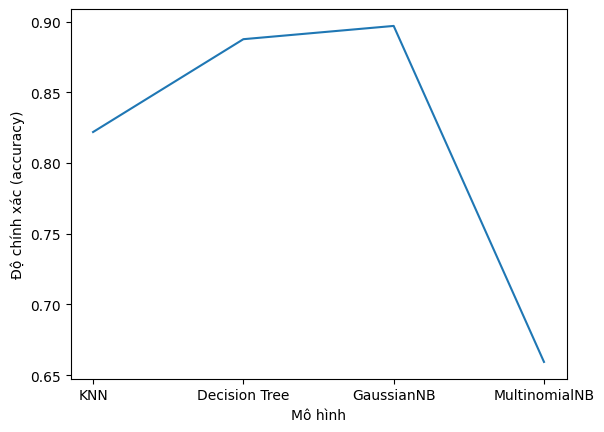

In [14]:
## Biểu diễn trực quan dữ liệu phân tích giá trị k
plt.plot(list_models, list_mean_acc)
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác (accuracy)')
plt.show()